In [1]:
!python --version

Python 3.7.6


In [1]:
import tensorflow as tf

In [2]:
tf.test.is_gpu_available(
    cuda_only=False, min_cuda_compute_capability=None
)

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [3]:
import src.data_prep as dp
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mplcyberpunk

In [4]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import NMF

In [6]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from textblob import TextBlob
import plotly.graph_objects as go

In [ ]:
import nltk
from nltk.corpus import stopwords

In [7]:
from os import path
from PIL import Image

In [8]:
%config InlineBackend.figure_format = 'retina'

In [9]:
plt.style.use("cyberpunk")
# plt.style.use('fivethirtyeight')
# plt.style.use('dark_background')
# plt.style.use('seaborn-bright')

In [10]:
reports = dp.import_data("data/data.json")
df = dp.create_df(reports)
df = df.reset_index()
df = df.rename(columns={"index": "id"})
df.head()

id        YEAR  SEASON      MONTH       STATE             COUNTY  \
0  60  1994-1997+  Spring        NaN  Washington      Skagit County   
1  70        2000  Summer       July    New York  Washington County   
2  76        1997  Summer       June    Arkansas      Baxter County   
3  77        1983    Fall  September  Washington    Kittitas County   
4  80        1983  Summer     August      Oregon        Lane County   

                                    LOCATION DETAILS  NEAREST TOWN  \
0  Up the Baker hwy., about 12 miles north from H...      Concrete   
1           1/2 mile into the trail to Buck Mountain    Queensbury   
2  THE LOCATION WAS IN THE GOVERNMENT TRACK LAND ...      Mt. Home   
3  I haven't been there in years, but an area map...        Yakima   
4  It was at Kitson Springs, near the Willamette ...  Bend, Oregon   

             NEAREST ROAD                                           OBSERVED  \
0            Mt.Baker Hwy  These two gentlmen, brothers, recluses age 50'...   
1      Shelving Rock Road  My wife and I were off the trail to take some ...   
2              101 bridge  I DID NOT SEE ANYTHING.  I DID HEAR A LOT.  WH...   
3  Chinook pass hyway 410  We had driven into Milk pond, up Chinook pass,...   
4            State Hwy 58  My veterinarian sister, former girlfriend, and...   

                                        ALSO NOTICED  \
0  Feces was found and sent to a University in Mo...   
1                                                NaN   
2                                        LOUD SHRILL   
3  we thought it was weird the frogs stopped, usa...   
4                                                NaN   

                                     OTHER WITNESSES  \
0                                                NaN   
1                                            My wife   
2                                 THRE TOTAL/FISHING   
3  my husband, Glenn.  we had a tape recorded, bu...   
4  3 persons total.  We were tring to get some sl...   

                                       OTHER STORIES  \
0  There is a ridge along their property-Doc Butt...   
1  The local Police chased a Bigfoot into the woo...   
2                                                NO.   
3                                                NaN   
4  On another occaison I had found and photograhe...   

                                 TIME AND CONDITIONS  \
0  These events occured from May all thru June an...   
1               2 pm , partly cloudy with light rain   
2  THIS INCIDENT DID TAKE PLACE ON THE EARLY MORN...   
3                                                NaN   
4              1:00AM dark, warm evening. clear sky.   

                                         ENVIRONMENT          DATE  
0  200 acres of interspersed Old growth Douglas Fir.  intermittant  
1  Next to a creek 300 feet off the trail to Buck...             9  
2  THE AREA IS A DENSE FOREST WHICH SURROUNDS A V...   25-27approx  
3  pine forest, you have to drive up to get to th...             ?  
4                      Forest, mountains and streams            12

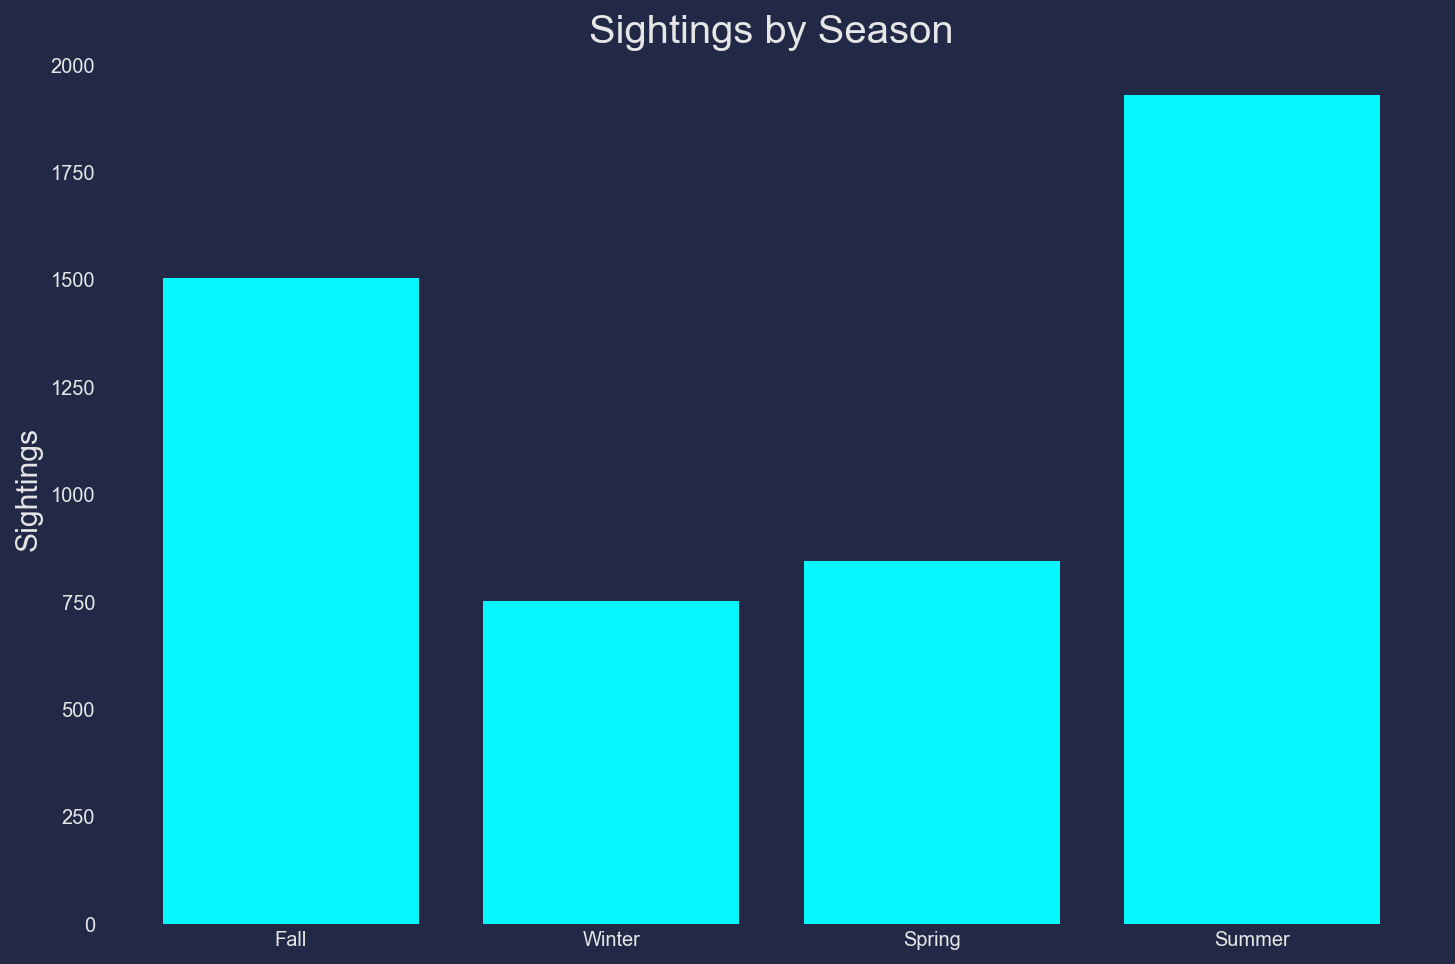

In [16]:
seasons = df.groupby('SEASON').count()['id']

fig, ax = plt.subplots(figsize=(12,8))
s = ['Fall','Winter','Spring','Summer']
ax.bar(s, seasons[s])
ax.set_title('Sightings by Season', fontsize=20)
ax.set_ylabel('Sightings', fontsize=15)
ax.grid(False)
plt.savefig('images/sightings_by_season1.png')
plt.show()

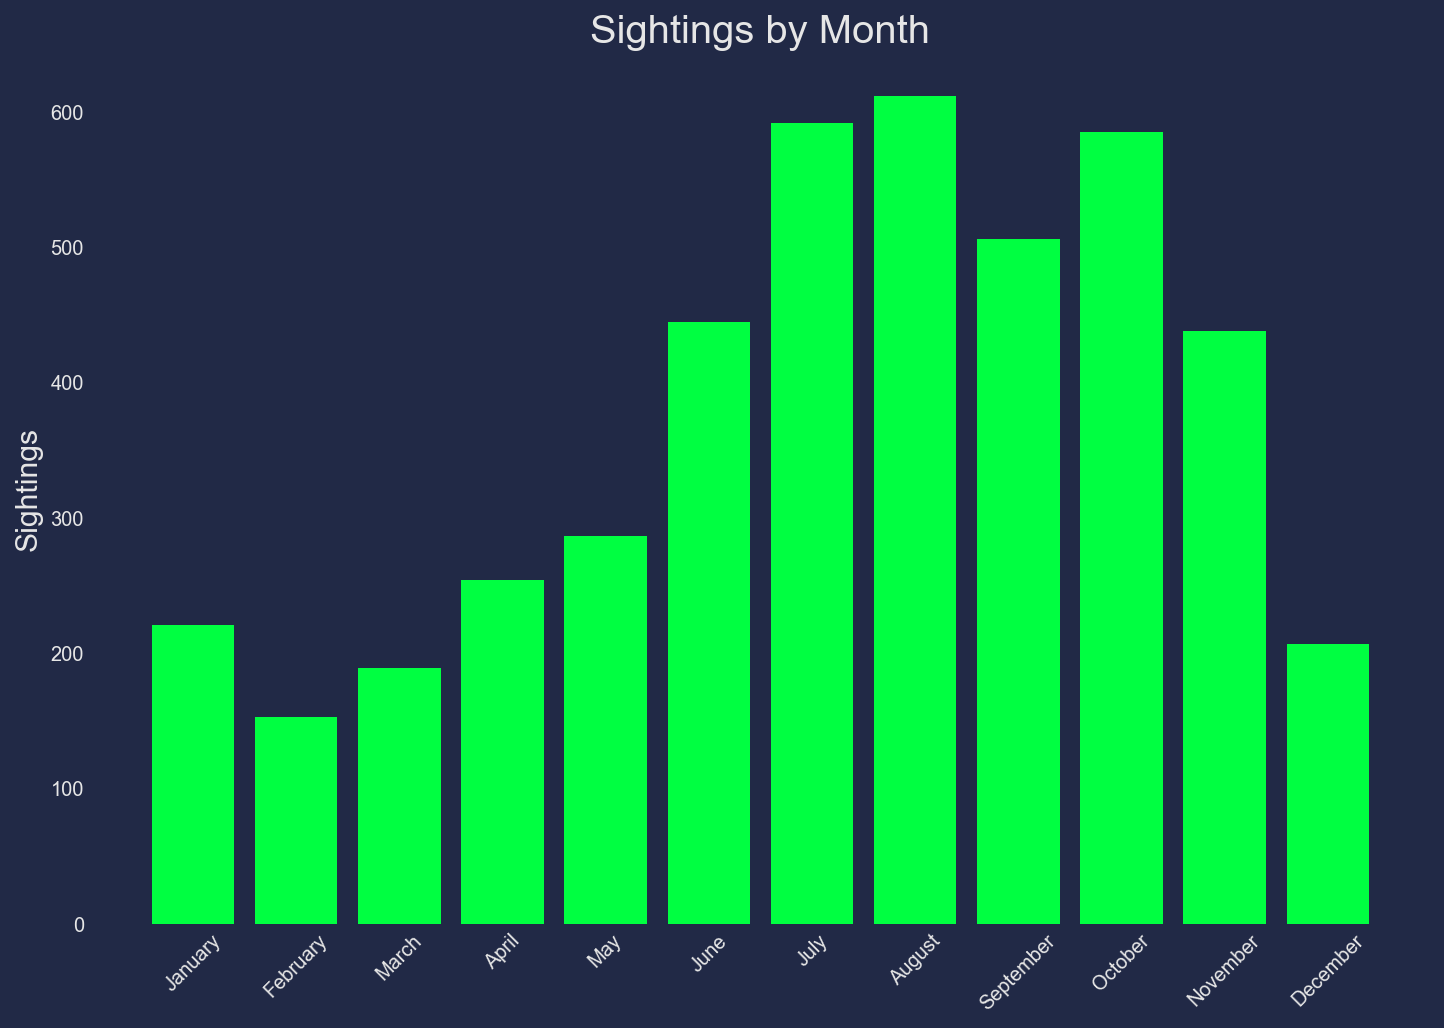

In [17]:
months = df.groupby('MONTH').count()['id']
fig, ax = plt.subplots(figsize=(12,8))
m = ['January','February','March','April','May','June','July','August','September','October','November','December']
ax.bar(m, months[m], color = '#00ff41')
ax.set_title('Sightings by Month', fontsize=20)
ax.set_ylabel('Sightings', fontsize=15)
ax.set_xticklabels(m, rotation=45)
ax.grid(False)
fig.savefig('images/month_bar_er.png')

In [8]:
def tryconvert(x):
    try:
        x = int(str(x[:4]))
    except:
        x = np.nan
    if x > 1000:
        return x
    else:
        return np.nan

df['YEAR'] = df['YEAR'].apply(lambda x: tryconvert(x))

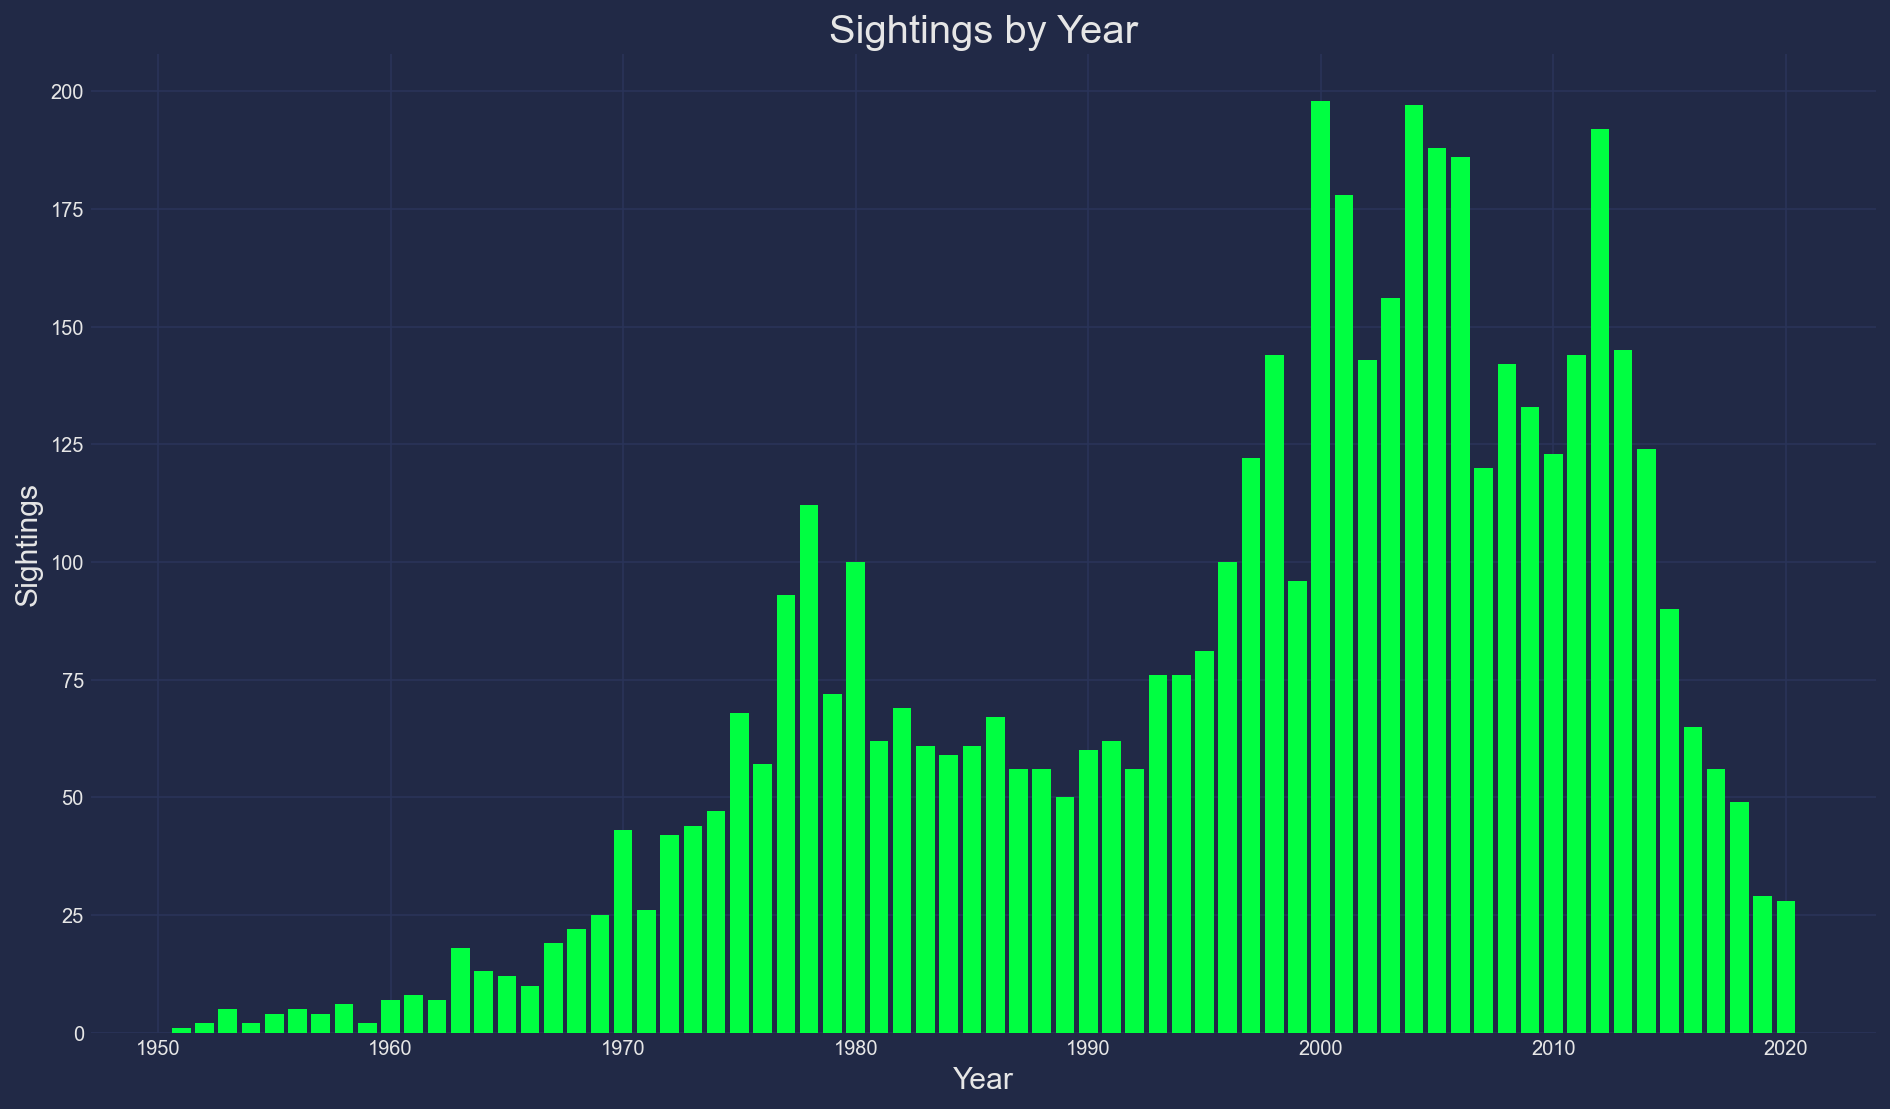

In [15]:
year = df.groupby('YEAR').count()['id']
year = year[year.index > 1950]
fig, ax = plt.subplots(figsize=(16,9))
ax.bar(year.index, year.values, color = '#00ff41')
ax.set_title('Sightings by Year', fontsize=20)
ax.set_ylabel('Sightings', fontsize=15)
ax.set_xlabel('Year', fontsize=15)
# fig.savefig('../images/year_bar_er.png')
plt.show()

## Plotly Graphs

In [11]:

# from plotly.graph_objs import *
# layout = Layout(
#     plot_bgcolor='rgba(0,0,0,0)'
# )

def plotly_usa(df, title, colorbar_title, width=500, height=500, color_scale='greens', scale_range='M', reverse_scale=False):
    grouped_df = df.groupby(['STATE']).count()['COUNTY']
    fig = go.Figure(data=go.Choropleth(
        locations=grouped_df.index, # Spatial coordinates
        z = grouped_df, # Data to be color-coded
        locationmode = 'USA-states', # set of locations match entries in `locations`
        colorscale = color_scale,
        colorbar_title = colorbar_title,
        reversescale = reverse_scale,
    ))

    fig.update_layout(
        title_text = title,
        geo_scope='usa', # limite map scope to USA
        width=width,
        height=height,
    )

    fig.show()

In [12]:
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}
# states = {state: abbrev for abbrev, state in us_state_abbrev.items()}
df['STATE'] = df['STATE'].map(us_state_abbrev)

In [13]:
plotly_usa(df, 'Bigfoot Sightings by State', "Report Count", width=1000, height=800, color_scale='greens')

In [16]:
WA_data = df[df['STATE']=='WA']
WA_data.to_csv('wa_data.csv')

In [17]:
!addfips wa_data.csv --state-field STATE --county-field COUNTY > wa_data_with_fips.csv

In [18]:
WA_data = pd.read_csv('wa_data_with_fips.csv')
WA_counts = WA_data.groupby('fips').count()

In [19]:
import plotly.figure_factory as ff

In [36]:
values = WA_counts['YEAR'].tolist()
fips = WA_counts.index.tolist()

In [57]:
endpts = list(np.mgrid[min(values):max(values):7j])

In [69]:
# "#030512",...,"#eafcfd"
colorscale = ["#1d1d3b","#323268","#3d4b94","#3e6ab0",
              "#4989bc","#60a7c7","#85c5d3","#b7e0e4"][::-1]
fig = ff.create_choropleth(
    fips=fips, values=values, scope=['Washington'], show_state_data=True,
    colorscale=colorscale, binning_endpoints=endpts, round_legend_values=True,
    plot_bgcolor='rgb(255,255,255)',
    paper_bgcolor='rgb(255,255,255)',
#     legend_title='Sightings by County',
    county_outline={'color': 'rgb(0,0,0)', 'width': 1.0},
    exponent_format=True,
)
fig.layout.template = None

title = 'Bigfoot Sightings in Washington by County'
width = 900
height = 600

fig.update_layout(legend=dict(
        yanchor="bottom",
        y=0.01,
        xanchor="left",
        x=0.01,
#         bgcolor="LightBlue",
        bordercolor="Black",
        borderwidth=2),
        legend_title="<b>Sightings by County</b>",
        title_text = title,
#         geo_scope='usa', # limite map scope to USA
        width=width,
        height=height,)


fig.show()

## NLP

In [6]:
observed_df = df.loc[df['OBSERVED'].notnull()]

In [7]:
cv = CountVectorizer()
cv_fit = cv.fit_transform(observed_df['OBSERVED'])

In [8]:
vocab_cv = cv.get_feature_names()
vocab_count = cv_fit.toarray().sum(axis=0)

In [9]:
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(observed_df['OBSERVED'])
vocab = np.array(sorted(tfidf.vocabulary_))
V = tfidf_matrix

In [10]:
cluster = KMeans(n_clusters=6)
cluster.fit(tfidf_matrix)
centroids = cluster.cluster_centers_

In [11]:
for idx, topic in enumerate(centroids):
    print(vocab[np.argsort(-topic)[:10]])

['heard' 'sound' 'like' 'tent' 'night' 'loud' 'sounded' 'sounds' 'camp'
 'scream']
['tracks' 'prints' 'print' 'snow' 'foot' 'inches' 'track' 'trail' 'toes'
 'footprints']
['just' 'saw' 'like' 'tree' 'woods' 'looked' 'trail' 'deer' 'got' 'feet']
['road' 'saw' 'car' 'driving' 'creature' 'tall' 'just' 'looked' 'hair'
 'like']
['creature' 'saw' 'area' 'large' 'river' 'seen' 'like' 'tall' 'feet'
 'bigfoot']
['house' 'window' 'door' 'heard' 'dogs' 'outside' 'like' 'dog' 'night'
 'went']


In [12]:
labels = np.array(['Heard', 'Tracking' 'Seen', 'Driving', 'Saw', 'House'])

In [13]:
report_label = labels[np.argmin(cluster.transform(tfidf_matrix), axis=1)]

IndexError: index 5 is out of bounds for axis 0 with size 5

In [ ]:
observed_df['label_clustering'] = report_label

In [ ]:
nmf = NMF(n_components=6)
nmf.fit(V)
W = nmf.transform(V)
H = nmf.components_

In [ ]:
for idx, topic in enumerate(H):
    print(vocab[np.argsort(-topic)[:15]])

In [6]:
labels = np.array(['Witnessed','Heard','Found Tracks','Saw from House','While Driving','While Camping'])

In [ ]:
report_label = labels[np.argmax(W, axis=1)]

In [ ]:
observed_df['label_NMF'] = report_label

In [ ]:
nmf.reconstruction_err_

In [ ]:
observed_df.to_csv('data/nlp_observed_df.csv')

In [3]:
observed_df = pd.read_csv('data/nlp_observed_df.csv')

In [10]:
observed_df = observed_df.rename(columns={'Unnamed: 0': 'id'})

In [11]:
observed_df.head()

id        YEAR  SEASON      MONTH       STATE             COUNTY  \
0  60  1994-1997+  Spring        NaN  Washington      Skagit County   
1  70        2000  Summer       July    New York  Washington County   
2  76        1997  Summer       June    Arkansas      Baxter County   
3  77        1983    Fall  September  Washington    Kittitas County   
4  80        1983  Summer     August      Oregon        Lane County   

                                    LOCATION DETAILS  NEAREST TOWN  \
0  Up the Baker hwy., about 12 miles north from H...      Concrete   
1           1/2 mile into the trail to Buck Mountain    Queensbury   
2  THE LOCATION WAS IN THE GOVERNMENT TRACK LAND ...      Mt. Home   
3  I haven't been there in years, but an area map...        Yakima   
4  It was at Kitson Springs, near the Willamette ...  Bend, Oregon   

             NEAREST ROAD                                           OBSERVED  \
0            Mt.Baker Hwy  These two gentlmen, brothers, recluses age 50'...   
1      Shelving Rock Road  My wife and I were off the trail to take some ...   
2              101 bridge  I DID NOT SEE ANYTHING.  I DID HEAR A LOT.  WH...   
3  Chinook pass hyway 410  We had driven into Milk pond, up Chinook pass,...   
4            State Hwy 58  My veterinarian sister, former girlfriend, and...   

                                        ALSO NOTICED  \
0  Feces was found and sent to a University in Mo...   
1                                                NaN   
2                                        LOUD SHRILL   
3  we thought it was weird the frogs stopped, usa...   
4                                                NaN   

                                     OTHER WITNESSES  \
0                                                NaN   
1                                            My wife   
2                                 THRE TOTAL/FISHING   
3  my husband, Glenn.  we had a tape recorded, bu...   
4  3 persons total.  We were tring to get some sl...   

                                       OTHER STORIES  \
0  There is a ridge along their property-Doc Butt...   
1  The local Police chased a Bigfoot into the woo...   
2                                                NO.   
3                                                NaN   
4  On another occaison I had found and photograhe...   

                                 TIME AND CONDITIONS  \
0  These events occured from May all thru June an...   
1               2 pm , partly cloudy with light rain   
2  THIS INCIDENT DID TAKE PLACE ON THE EARLY MORN...   
3                                                NaN   
4              1:00AM dark, warm evening. clear sky.   

                                         ENVIRONMENT          DATE  \
0  200 acres of interspersed Old growth Douglas Fir.  intermittant   
1  Next to a creek 300 feet off the trail to Buck...             9   
2  THE AREA IS A DENSE FOREST WHICH SURROUNDS A V...   25-27approx   
3  pine forest, you have to drive up to get to th...             ?   
4                      Forest, mountains and streams            12   

  label_clustering      label_NMF  
0            Heard      Witnessed  
1          Driving          Heard  
2          Driving          Heard  
3            Heard  While Camping  
4          Driving          Heard

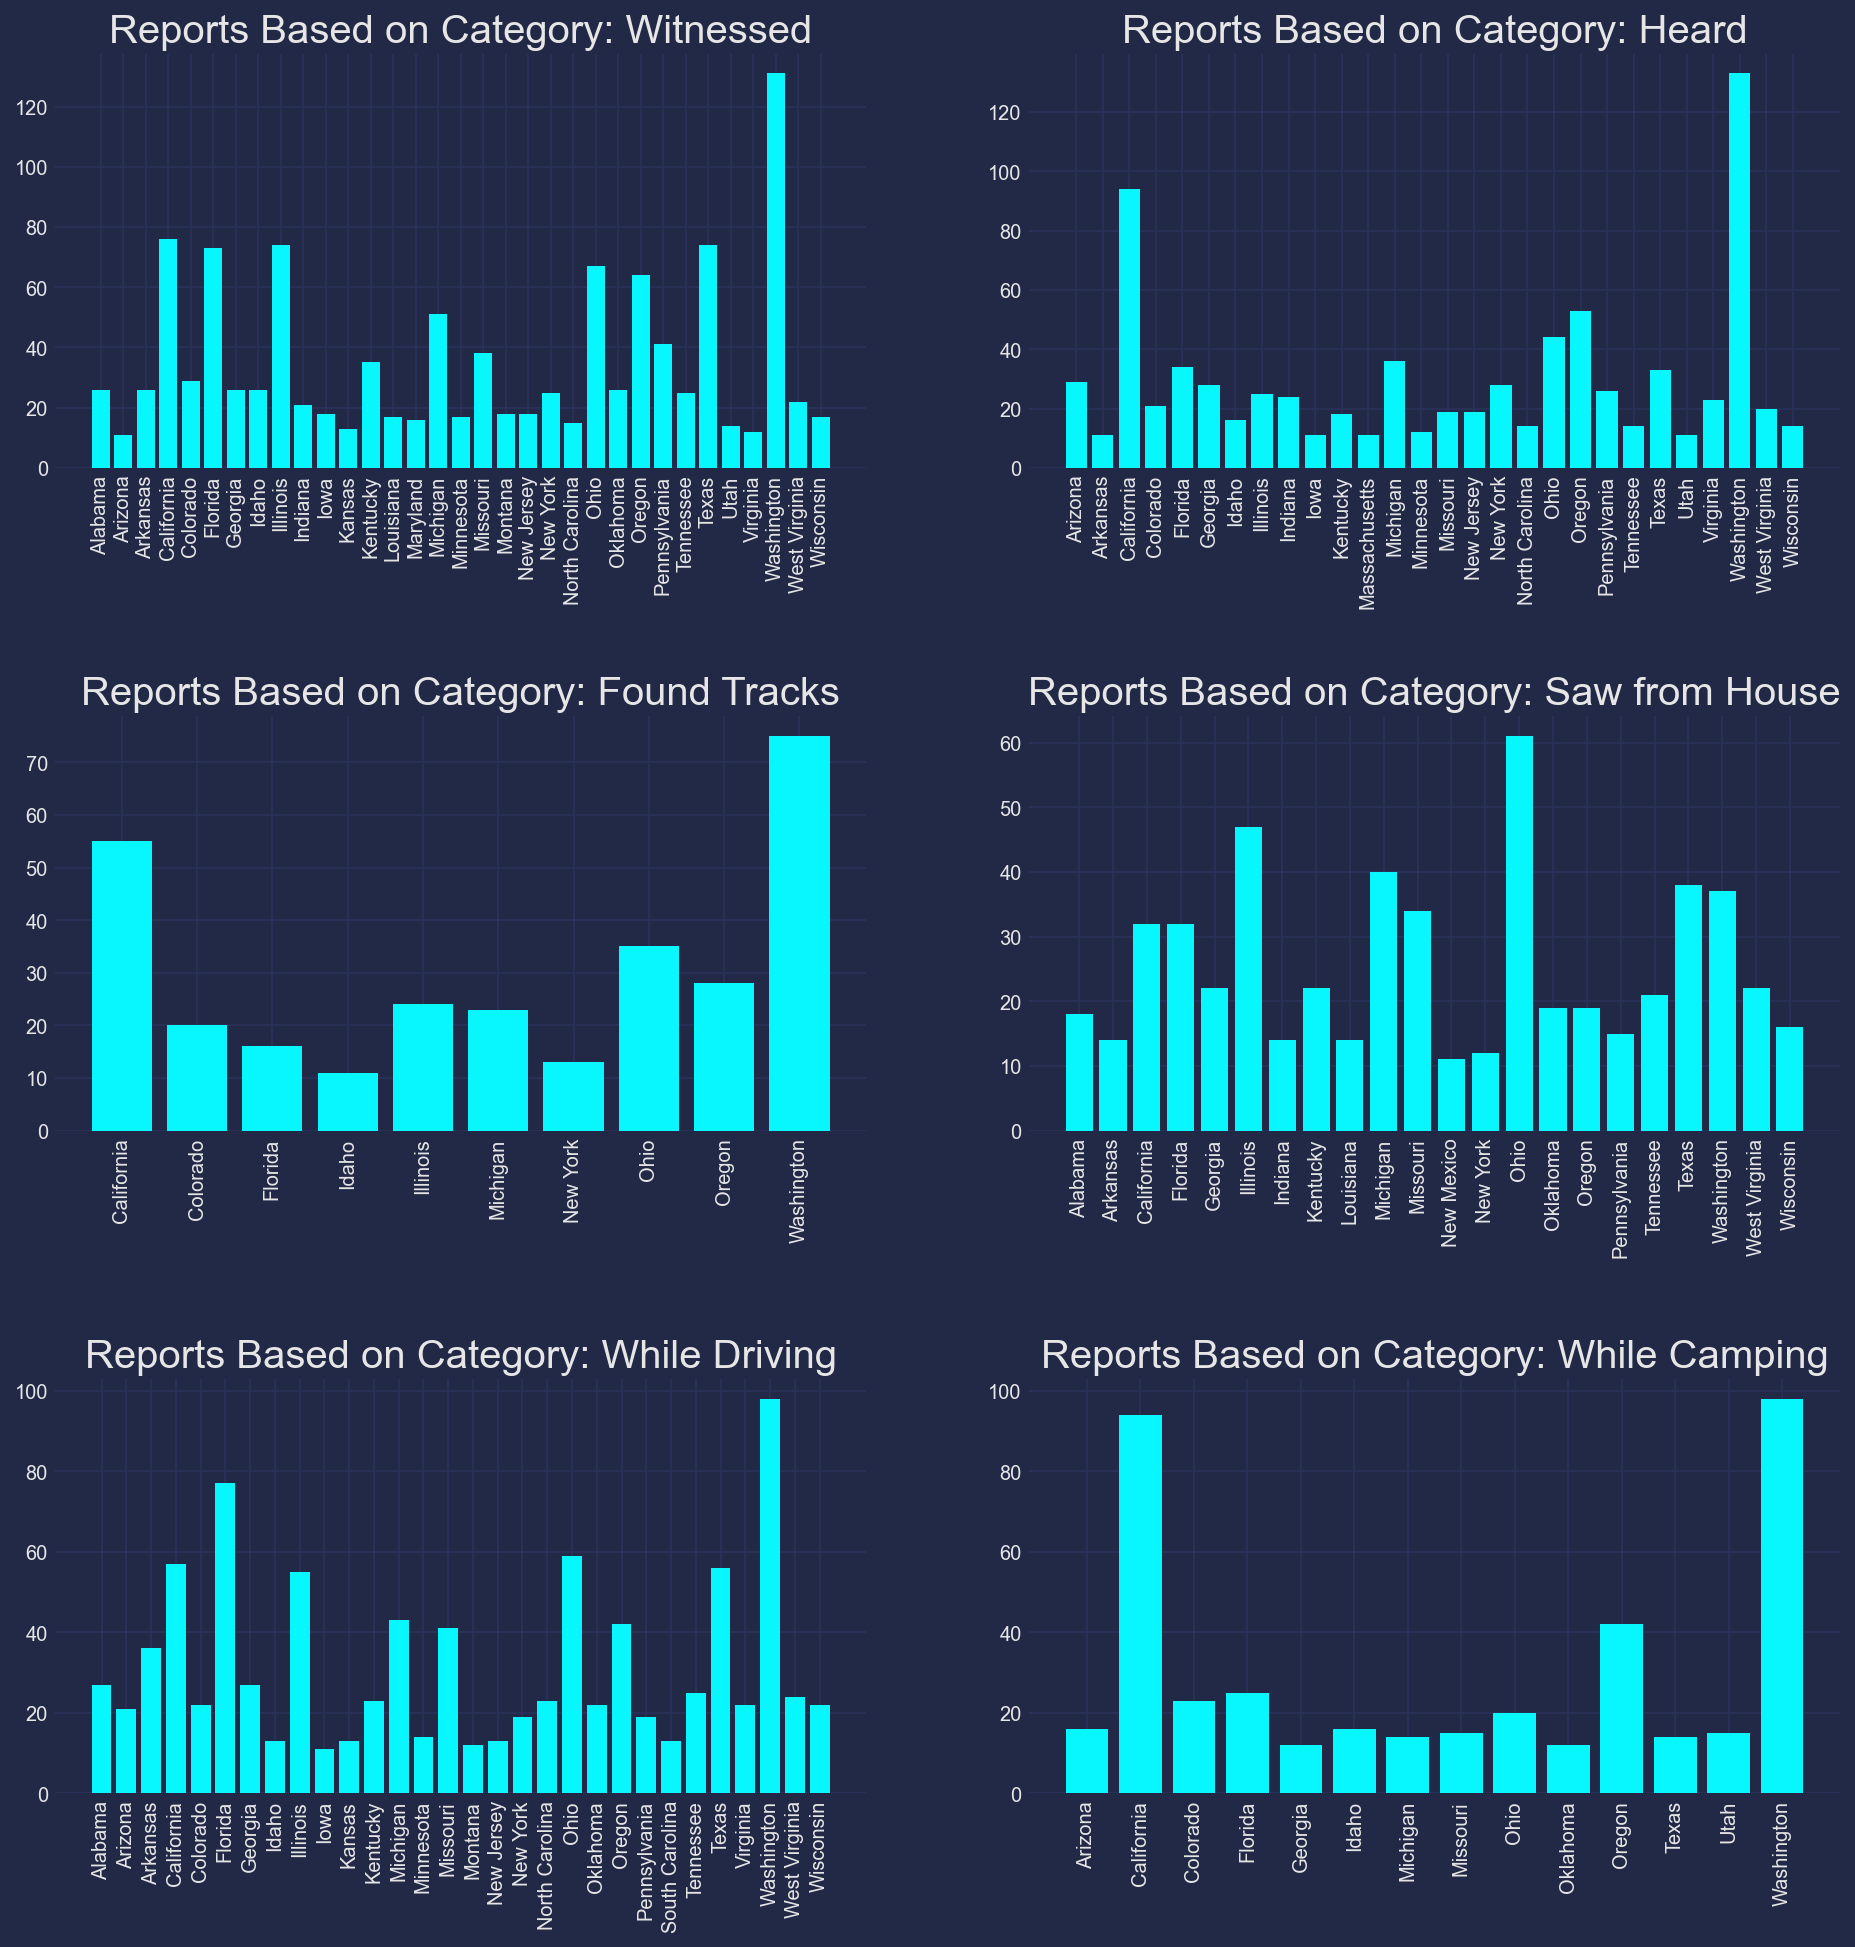

In [13]:
fig, axs = plt.subplots(3,2, figsize=(16,16))
plt.subplots_adjust(hspace=0.6)
for idx, ax in enumerate(axs.flatten()):
    lab = labels[idx]
    samp = observed_df[observed_df['label_NMF'] == lab]
    states = samp.groupby('STATE').count()['id']
    states = states[states.values > 10]
    ax.bar(states.index, states.values)
    for tick in ax.get_xticklabels():
        tick.set_rotation(90)
    title = 'Reports Based on Category: ' + lab
    ax.set_title(title, fontsize=20)
plt.show()
fig.savefig('images/labels_er.png', bbox_inches='tight')

In [19]:
states.values

array([16, 94, 23, 25, 12, 16, 14, 15, 20, 12, 42, 14, 15, 98],
      dtype=int64)

In [25]:
states = pd.DataFrame()

for i in range(len(labels)):
    add = observed_df[observed_df['label_NMF'] == labels[i]]['STATE'].value_counts(dropna=False)
    add_df = pd.DataFrame(data=add.values.reshape(1,-1), columns=add.index.values, index=[labels[i]])
    states = states.append(add_df)
    
states = states.fillna(0)
states = states.drop(columns=np.nan)

cumstates = np.cumsum(states.values, axis=0)

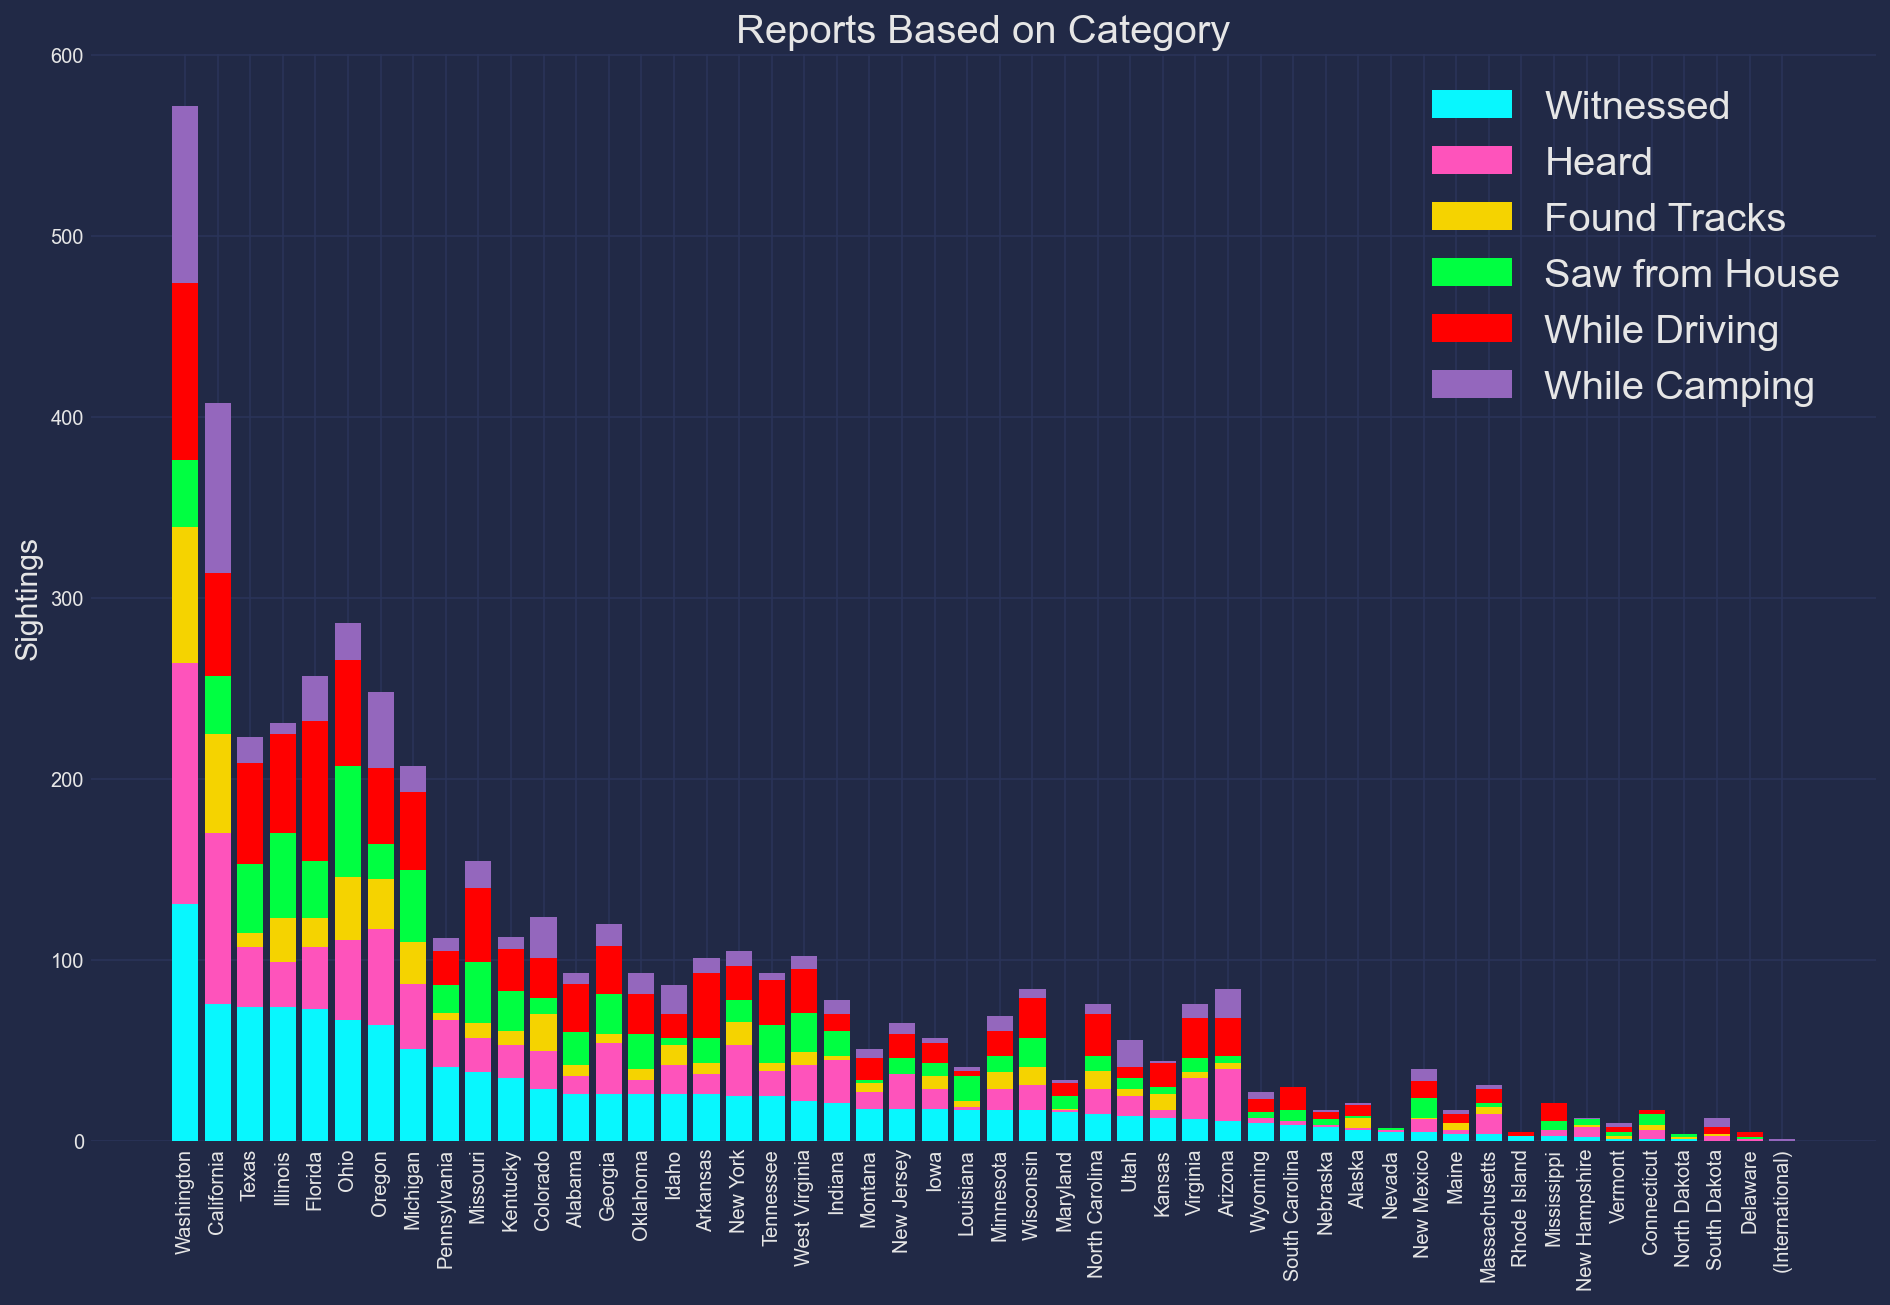

In [27]:
fig, ax = plt.subplots(figsize=(16,10))

ax.bar(states.columns, states.iloc[0].values)

for idx, lab in enumerate(labels[1:]):
    ax.bar(states.columns, states.iloc[idx+1].values, bottom=cumstates[idx])
    
for tick in ax.get_xticklabels():
    tick.set_rotation(90)
title = 'Reports Based on Category'
ax.set_title(title, fontsize=20)
ax.set_ylabel('Sightings', fontsize=15)
ax.legend(labels, fontsize=20)
mplcyberpunk.make_lines_glow()
# fig.savefig('../images/labels_all_er.png', bbox_inches='tight')

## Word Cloud

In [ ]:
dp.get_bag_of_words(df, ['OBSERVED', 'ALSO NOTICED', 'OTHER STORIES', 'ENVIRONMENT', 'TIME AND CONDITIONS', 'LOCATION DETAILS'], 'data', 'bagofwords')

In [9]:
with open('data/bagofwords.txt', "r", encoding='utf-8') as f:
    data = f.read()

In [13]:
print('character length of bag of words: ', len(data))

character length of bag of words:  12637223


In [20]:
print(data[:300])

These two gentlmen, brothers, recluses age 50's phoned me and explained these events. They own and operate a cattle ranch. They have over 200 acres of interspersed Old growth Douglas Fir and graze. There is virtually no access (by vehicle) to their land, because of swamps, creeks and no roads, excep


In [65]:
s = data
s = s.replace('  ', ' ').split(' ')
bow = []
for j in s:
    k = ''.join([i for i in j if i.isalpha()])
    if len(k) > 1:
        bow.append(k)

In [67]:
bow[:25]

['These',
 'two',
 'gentlmen',
 'brothers',
 'recluses',
 'age',
 'phoned',
 'me',
 'and',
 'explained',
 'these',
 'events',
 'They',
 'own',
 'and',
 'operate',
 'cattle',
 'ranch',
 'They',
 'have',
 'over',
 'acres',
 'of',
 'interspersed',
 'Old']

In [78]:
def remove_stopwords(word_list, stop_words):
    """input: a list of words
       output: a list of words with stop_words removed"""
    valids = []
    for word in word_list:
        if word not in stop_words:
            valids.append(word)
    return ' '.join(valids)


In [74]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\natha\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [75]:
stop_words = set(stopwords.words('english'))

In [79]:
t = remove_stopwords(bow, stop_words)


In [70]:
def random_color_func(word=None, font_size=None, position=None,  orientation=None, font_path=None, random_state=None):
    h = int(360.0 * 1.0 / 255.0)
    s = int(100.0 * 255.0 / 255.0)
    l = int(100.0 * float(random_state.randint(60, 120)) / 255.0)

    return "hsl({}, {}%, {}%)".format(h, s, l)

In [81]:
bigfoot_mask = np.array(Image.open("images/bigfoot-outline.jpg"))

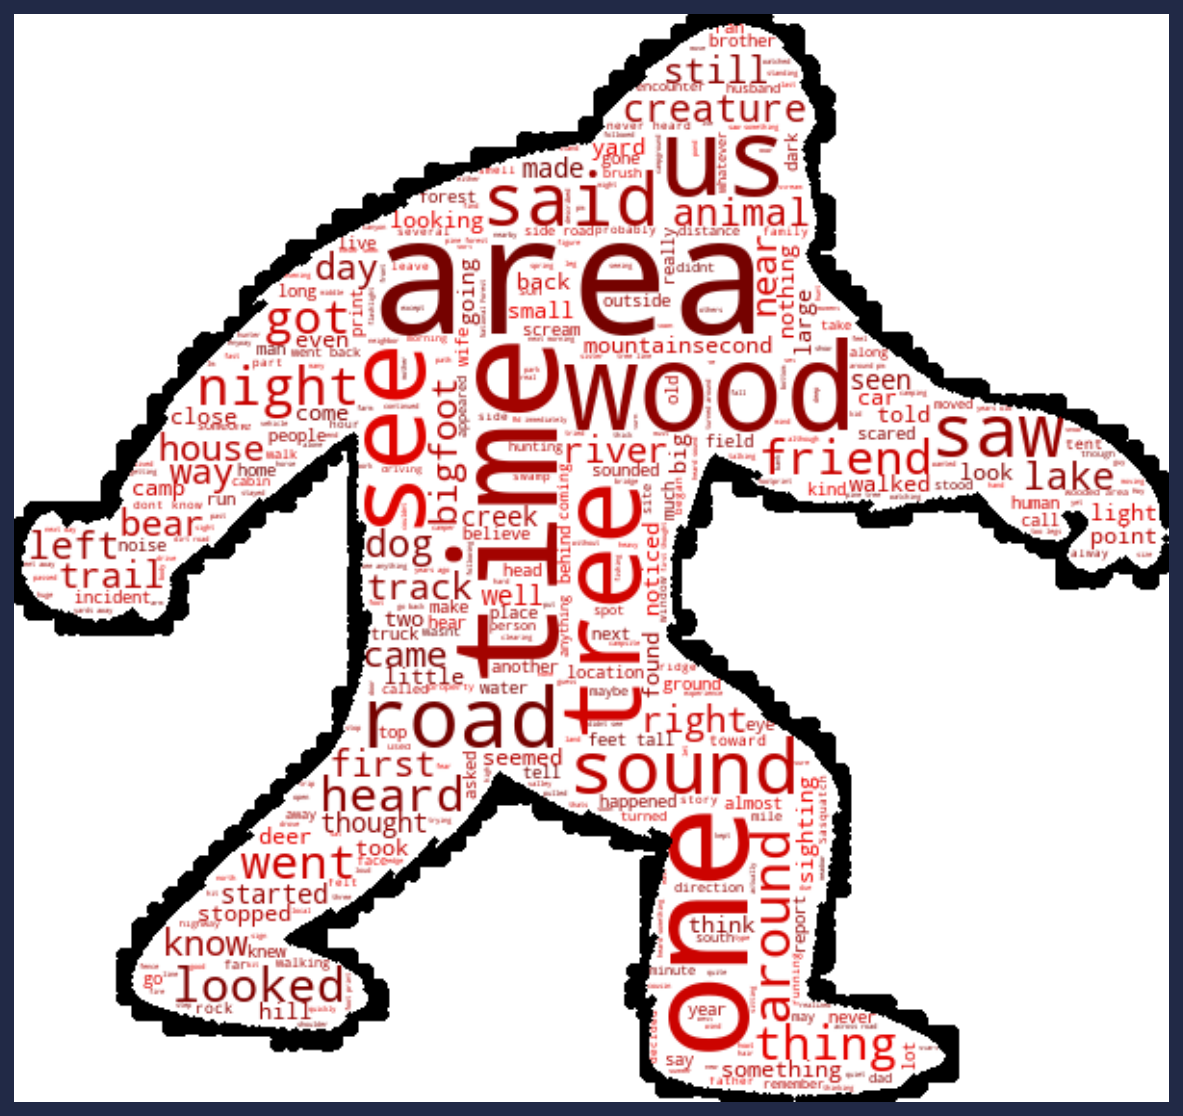

In [82]:
wc = WordCloud(background_color="white", max_words=1000, mask=bigfoot_mask,
               contour_width=6, contour_color='black', color_func=random_color_func)

# Generate a wordcloud
wc.generate(t)

# store to file
wc.to_file("images/bigfoot_words.png")

# show
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()